**House Price Prediction**

The Boston Housing dataset contains information about various factors affecting housing prices in the Boston area. It includes features such as the per capita crime rate, average number of rooms per dwelling, proportion of residential land zoned for lots over 25,000 square feet, and more.


**Columns:**

**CRIM**: per capita crime rate by town

**ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**: proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX**: nitric oxides concentration (parts per 10 million)

**RM**: average number of rooms per dwelling

**AGE**: proportion of owner-occupied units built prior to 1940

**DIS**: weighted distances to five Boston employment centres

**RAD**: index of accessibility to radial highways

**TAX**: full-value property-tax rate per $10,000

**PTRATIO**: pupil-teacher ratio by town

**B**: 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s (target variable)


Predicting House prices is one of the most common application of machine learning algorithm such as **Linear Regression**.

Linear Regression is a supervised learning algorithm is trained via correct output labels. Linear regression is a linear model that assumes a linear relationship between inputs and outputs and minimizes the cost error between predicted and actual values using gradient descent.



**Why use Linear Regression algorithm?**

Linear regression algorithm is particularly use when:
1. Linear regression is simple to implement and easily interpretable algorithm.

2. Take less training time to train even for large datasets.

3. Linear regression coeffiecients are easy to implement.

**1. Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


**2. Load Dataset**

In [3]:
housing_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/House Price Prediction/Boston.csv')

In [4]:
# Display first 5 rows
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


MEDV column(target column) contains the median value of owner-occupied houses in 1000rs, and this is the value that we will predicting based on the values in the other columns using Linear Regression.

**3. Data Preprocessing**

In [5]:
# Display shape of dataset
housing_data.shape

(506, 14)

There are 506 rows and 14 columns in the dataset.

In [6]:
# Display basic information about dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# check null values
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# check duplicate value
housing_data.duplicated().sum()

0

There is no any missing and duplicate values in the dataset.

In [8]:
# display stastical information of dataset.
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**4. Data Visulization**

**Distribution of housing Prices**

Visualize the distribution of median housing prices across different neighbourhoods in Boston using Histograms. This will help to understand the range and distribution of housing prices in the dataset.

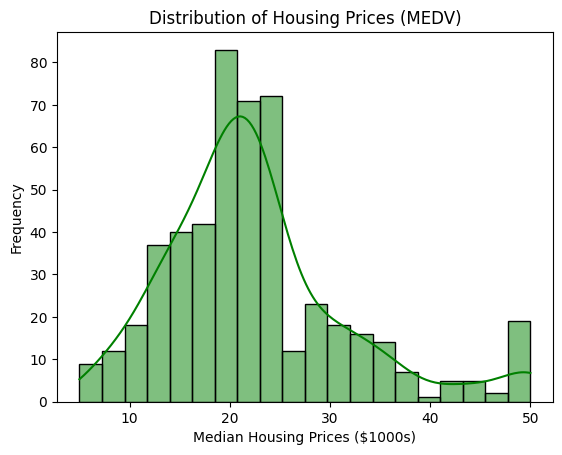

In [9]:
sns.histplot(housing_data['MEDV'], bins=20, kde=True, color='green')
plt.title('Distribution of Housing Prices (MEDV)')
plt.xlabel('Median Housing Prices ($1000s)')
plt.ylabel('Frequency')
plt.show()

From the above graph we can see that,

Prices range from 5000 to 50000 (in dollors), indicating diverse range of property values.

A right-skewed distribution indicates that there are fewer properties with very high prices compared to the number of properties with lower to moderate prices.

**Distribution of housing Ages**

This visulization provides insights into the variability of housing ages across different areas of pf Boston.

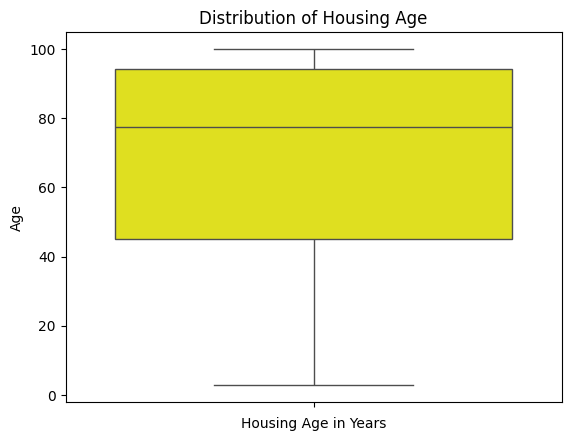

In [10]:
sns.boxplot(housing_data['AGE'], color = 'yellow')
plt.title('Distribution of Housing Age')
plt.xlabel('Housing Age in Years')
plt.ylabel('Age')
plt.show()

From the above boxplot we can observed that,

The dataset shows a wide range of property ages, with some properties being relatively new and others significantly older.

Property ages range from minimum 30 and maximum 100 years.

Property age can influence maintainance cost and property condition.

**Scatter plot**

*1. Crime rate of housing area vs Housing Prices*

This scatter plot visualize the relationship between the Crime Rate of Area(CRIM) and the median hosuing prices(MEDV) in the dataset.

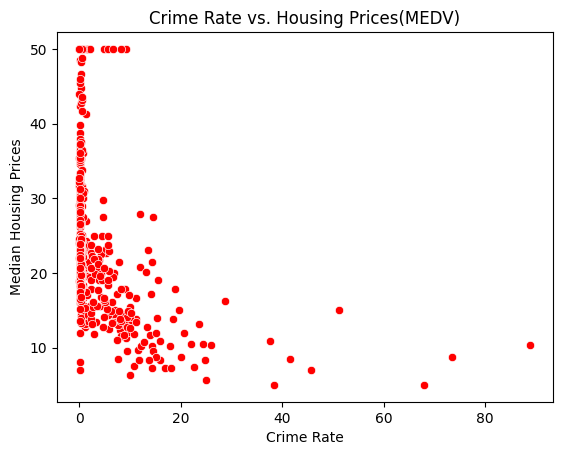

In [11]:
sns.scatterplot(x = 'CRIM' , y = 'MEDV', data = housing_data, color = 'red')
plt.title('Crime Rate vs. Housing Prices(MEDV)')
plt.xlabel('Crime Rate')
plt.ylabel('Median Housing Prices')
plt.show()

From the above scatter plow we observed that,

Areas with higher crime rates (CRIM) tend to have lower median housing prices (MEDV), and vice versa.

This indicates that crime rate could be a significant factor influencing housing prices in the dataset.

2. Rooms per Dwelling (RM) vs. Housing Prices(MEDV)

This scatter plot visualize the relationship between the average number of rooms per dwelling (RM) and the median hosuing prices (MEDV) in the dataset. Each point on the plot represent a single observation from the dataset.

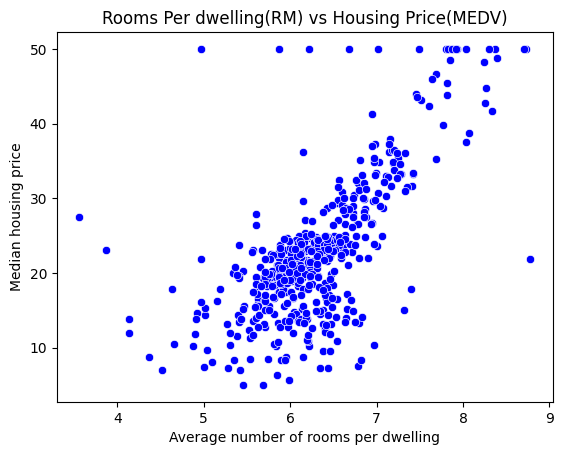

In [12]:
sns.scatterplot(x = 'RM', y = 'MEDV', data = housing_data, color = 'blue')
plt.title('Rooms Per dwelling(RM) vs Housing Price(MEDV)')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median housing price')
plt.show()

From the above graph we can see that,

Get Positive relationship between the number of rooms per dwelling and housing prices.



Average Housing Prices by accessibility of road highways

In [13]:
rad_medv_mean = housing_data.groupby('RAD')['MEDV'].mean().reset_index()
rad_medv_mean

,RAD,MEDV
0,1,24.365000
1,2,26.833333
2,3,27.928947
3,4,21.387273
4,5,25.706957
5,6,20.976923
6,7,27.105882
7,8,30.358333
8,24,16.403788


This bar plot illustrates the relationship between the accessibility of road highways (RAD) and the average house price (MEDV) in various neighborhoods.

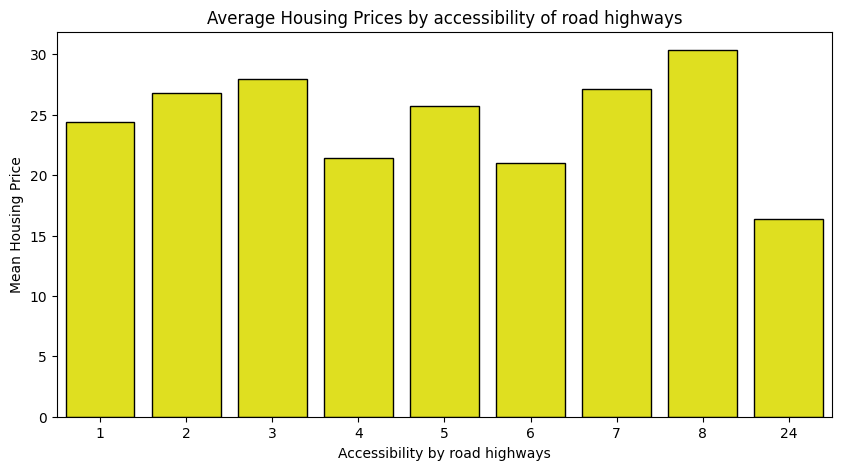

In [15]:
# Draw bar plot for Average Housing Prices by accessibility of road highways
plt.figure(figsize = (10,5))
sns.barplot(x = 'RAD', y = 'MEDV', data = rad_medv_mean, color = 'yellow', edgecolor = 'black')
plt.title('Average Housing Prices by accessibility of road highways')
plt.xlabel('Accessibility by road highways')
plt.ylabel('Mean Housing Price')
plt.show()

From the above graph we can see that,

There is a notable outlier at RAD=24 where the MEDV is substantially lower compared to the surrounding data points.

When RAD = 8 where the MEDV is higher compared to other surrounding data points.


**Boston Housing Feature**

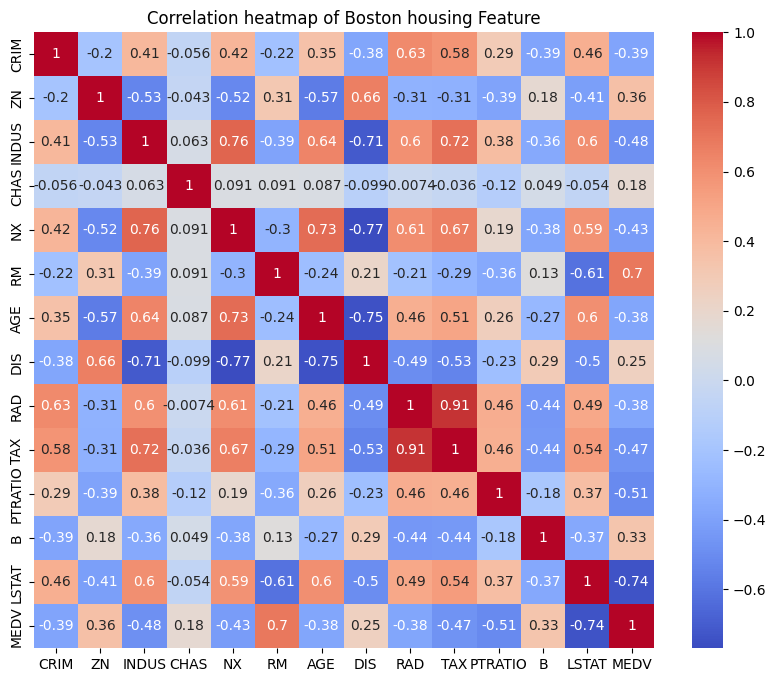

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(housing_data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation heatmap of Boston housing Feature')
plt.show()

Heatmap to visualize the correlation matrix of all features in the dataset. This will help identify which features are most strongly correlated with housing prices and with each other.

Strong positive correlation between the number of rroms and median hosuing prices(MEDV)

Strong negative correlation between the percentage of lower status population (LSTAT) and median housing prices

Moderate negative correlations between industrial land proportion (INDUS) and pupil-teacher ratio (PTRATIO) with median housing prices.

Weak negative correlation between crime rate (CRIM) and median housing prices.

Weak positive correlation between properties along the Charles River (CHAS) and median housing prices.

Potential multicollinearity between accessibility to radial highways (RAD) and property-tax rate (TAX).

**5. Data Spliting**

In [18]:
X = housing_data.drop(columns = ['MEDV'])
y = housing_data['MEDV']

In [20]:
# spliting data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [21]:
# shape of splitted data
print("The shape of X_train :", X_train.shape)
print("The shape of X_test :", X_test.shape)
print("The shape of y_train :", y_train.shape)
print("The shape of y_test :", y_test.shape)

The shape of X_train : (379, 13)
The shape of X_test : (127, 13)
The shape of y_train : (379,)
The shape of y_test : (127,)


**6. Model Training**

**Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predictions of Linear regression on Testing data
y_pred_lr = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error:  3.060939595437071
Mean Squared Error:  22.09869482709818
Root Mean Squared Error:  4.7009248906037815


In [33]:
# find accuracy score of model
from sklearn.metrics import mean_absolute_percentage_error
error = mean_absolute_percentage_error(y_pred_lr, y_test)

print('Accuracy score of Linear regression model is: %.2f'%((1 - error) * 100 ), '%')

Accuracy score of Linear regression model is: 63.88 %


In [34]:
# display actual and predicted values side by side
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred_lr.tolist()})
comparison_df

,Actual,Predicted
0,23.6,28.838854
1,32.4,36.007833
2,13.6,15.083248
3,22.8,25.230909
4,16.1,18.878641
...,...,...
122,8.8,3.284209
123,19.2,23.798796
124,25.3,25.733299
125,20.4,23.048156


**Making Prediction on single data point**

In [35]:
# Find the shape of the feature vector at the first index in the test set.
X_test.values[1].shape

(13,)

In [37]:
# To make prediction on a single record the feature vector in the form of row vector. You can convert the feature vector into row vector using reshape method.
single_point = X_test.values[1].reshape(1, -1)
single_point.shape

(1, 13)

To make prediction, you simply have to pass the row feature vector to the predict() method of the trained linear regressor

In [39]:
lr.predict(X_test.values[1].reshape(1, -1))

array([36.00783288])

In [40]:
# Find actual value for house price for the feature index of 1.
y_test.values[1]

32.4

The actual value is 32 thousand, which means that our prediction has an error of an estimated 4 thousand.